In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#we define first the value of h,the corresponding range in x and the constants
h=0.2
a=20.0 
bXR=300.0
kXR=3000.0
gXR=0.333
dXRa=10.0 #d (actived XR)
aX=20.0
bX=300.0 
bXR=20.0
nX=2.0
kx=3000.0
gCY=0.2
kXR=3000.0
gXRa=0.333
dXR=10.0

n_points = int((4000.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points)
CY = zeros(n_points)
A = zeros(n_points)
XRa = zeros(n_points)
#A no cambia 


In [5]:
#definimos todas las ecuaciones 
def func_XI_prime(t,XI,LI,EA,CL):
    return 10+((300*pow(CL,2))/(pow(CL,2)+pow(4000,2)))-(1/30.0)*XI
def func_LI_prime(t,XI,LI,EA,CL):
    return 10+((300*pow(CL,2))/(pow(CL,2)+pow(4000,2)))-(1/30.0)*LI
def func_EA_prime(t,XI,LI,EA,CL):
    return 10+((300)/(1.0+(pow(LI,2)/pow(4000,2))))-(1/30.0)*EA


#we define all the functions 

def func_XR_prime(t,XR,CY,XRa,A):
    return a -((bXR)/(1.0+(A/kXR)))-(gXR*XR)+(dXRa*XRa)

def func_CY_prime(t,XR,CY,XRa,A):
    return aX+((bX*pow(XRa,nX))/(pow(kx,nX)+pow(XRa,nX)))-(gCY*CY)

def func_XRa_prime(t,XR,CY,XRa,A):
    return (bXR/(1.0+(A/kXR)))-(gXRa*XRa)-(dXRa*XRa)

In [13]:
t[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
XRa[0] = 0.0
A[0] = 0.0

for i in range(800):
    A[i]=0.0
for i in range(801,n_points):
    A[i]=4000*sin(t[i]/100)+4000

for i in range(1,n_points):
  
    k1_XR = func_XR_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])
    k1_XRa = func_XRa_prime(t[i-1],XR[i-1],CY[i-1],XRa[i-1],A[i-1])
    
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XR1 = XR[i-1] + (h/2.0) * k1_XR
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa

    k2_XR = func_XR_prime(t1,XR1,CY1,XRa1,A[i-1])
    k2_CY = func_CY_prime(t1,XR1,CY1,XRa1,A[i-1])
    k2_XRa = func_XRa_prime(t1,XR1,CY1,XRa1,A[i-1])
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XR2 = XR[i-1] + (h/2.0) * k2_XR
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
     
    k3_XR = func_XR_prime(t2,XR2,CY2,XRa2,A[i-1])
    k3_CY = func_LI_prime(t2,XR2,CY2,XRa2,A[i-1])
    k3_XRa = func_EA_prime(t2,XR2,CY2,XRa2,A[i-1])
    
    
    #third step
    t3 = t[i-1] + h
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    
    k4_XR = func_XR_prime(t3,XR3,CY3,XRa3,A[i-1])
    k4_CY = func_CY_prime(t3,XR3,CY3,XRa3,A[i-1])
    k4_XRa = func_XRa_prime(t3,XR3,CY3,XRa3,A[i-1])
    
    
     #fourth step
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)

    t[i] = t[i-1] + h
    XR[i] = XR[i-1] + h * average_k_XR
    CY[i] = CY[i-1] + h * average_k_CY
    XRa[i] = XRa[i-1] + h * average_k_XRa
    



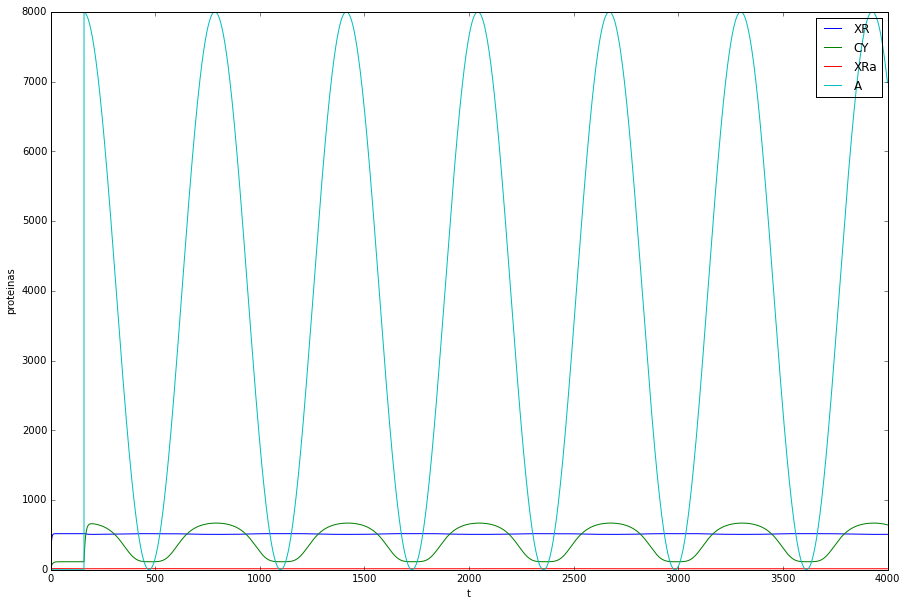

In [14]:
plot(t,XR,label='XR')
plot(t,CY,label='CY')
plot(t,XRa,label='XRa')
plot(t,A,label='A')
plt.xlabel('t')
plt.ylabel('proteinas')
legend()
figure(figsize(15,10))